In [ ]:
%load_ext autoreload
%autoreload 2

from netty.netty import Netty
import img_utils as im
import numpy as np
from netty import netty_utils as nutil
from IPython.display import clear_output

In [ ]:
net = Netty()
net.clear()
net.args["style_layers"] = [1,4,7]
net.build()

In [ ]:
a = im.load("data/in01/095.jpg")
b = im.load("data/out01/metal01.jpg")
c = im.load("data/out03/02.png")
b = im.set_color(b,a,True,False)
# b = im.load("data/1/125.jpg")
# aa = im.rot(a)
# aam = im.rot(am)
# ab = im.rot(np.flip(a,0))
# abm = im.rot(np.flip(am,0))
# imgs = aa+ab
imgs = [a,b,c]
# masks = aam+abm
masks = None
scale = 1
scales = [im.propscale([1024*(1/scale),1024*(1/scale)],a.shape[:2])*0.25,1,1]
# scales = [scale,scale,scale];
w = [1,1,0.25]

In [100]:
a1 = im.load("data/in03/moon_c1.png")
a2 = im.load("data/in03/moon_c2.png")
b1 = im.load("data/in03/metal_c1.png")
b2 = im.load("data/in03/metal_c2.png")
c = im.load("data/in03/black.png")
_imgs = [[a1,b1,c],[a2,b2,c]]
__size = [1024,1024]
_scale = [1,0.75,0.5,0.25]
_w = [0,0.125,0.25,0.5]
_w2 = [[1,1],[0.75,1.25],[1.25,0.75]]

args = []
for __scale in _scale:
    for __w in _w:
        for __w2 in _w2:
            for __imgs in _imgs:

                args.append({
                        "size" : __size,
                        "imgs" : __imgs,
                        "masks" : None,
                        "scales" : [im.propscale(__size,__imgs[0].shape[:2]) * __scale, 1],
                        "w": (__w2[0],__w2[1],__w)    
                          })

In [99]:
args[0]

{'imgs': [array([[[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
  
         ...,
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]]], dtype=uint8), array([[[ 99, 107,  82],
          [ 97, 107,  82],
          [ 98, 108,  83],
          ...,

[730, 730]
116
Setting style...
Setup...
Render!
. . . . . . . . . . 10 . . . . . . . . . 20 . . . . . 

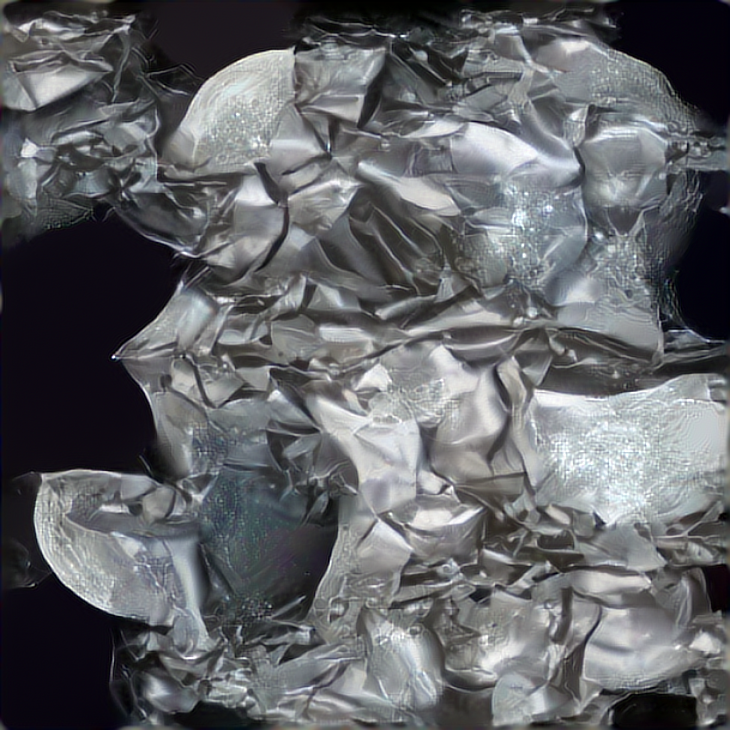

. . . . 30 . . . . . . . . . 40 . . . . . . . . . 50 

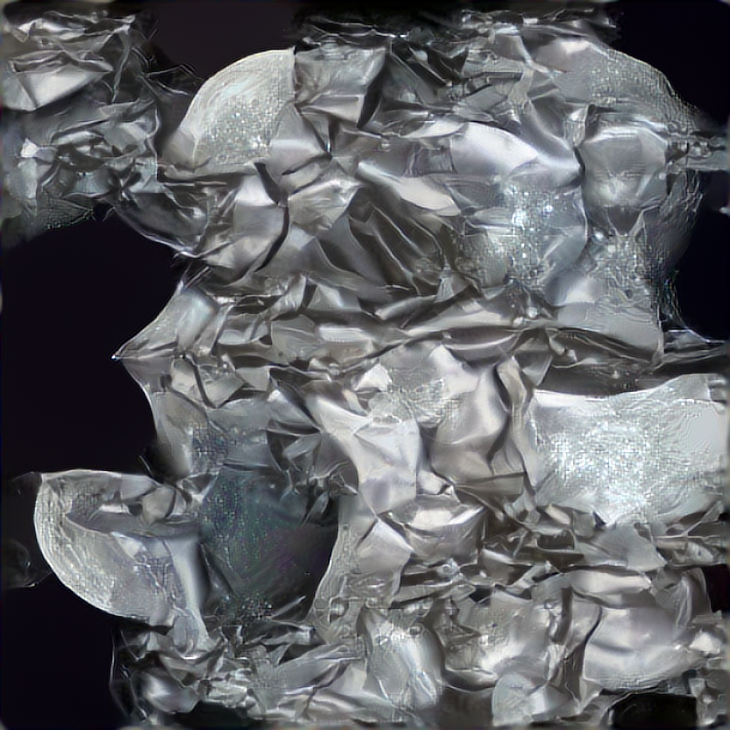

. . . . . . . . . 60 . . . . . . . . . 

In [ ]:
make(args)

In [97]:
def make(args):
    for arg in args:
        
        x = None
        s,m = nutil.incremental(arg["size"],512//3,1.2,500)

        for s_,m_ in zip(s,m):
            print(s_)
            print(m_)
            net.args["size"] = s_
            net.args["maxfun"] = m_
            print("Setting style...")
            net.set_style(arg["imgs"],arg["masks"],arg["scales"],arg["w"])
            net.set_x0(x)
            print("Setup...")
            net.setup()
            print("Render!")
            x=net.render()
            clear_output()
            im.save_frame(x,"data/bim",q=90)            
        im.save_frame(x,"data/out04",q=100)

In [ ]:
a = im.load("data/in01/095.jpg")
b = im.load("data/out01/metal01.jpg")
c = im.set_color(a,b,True,False)
im.show(b)

In [ ]:

im.show(x)

In [ ]:
x = None
# x = im.load("data/out01/map02.jpg")
s,m = nutil.incremental([1024,1024],512//3,1.2,500)

for s_,m_ in zip(s,m):
    print(s_)
    print(m_)
    net.args["size"] = s_
    net.args["maxfun"] = m_
    print("Setting style...")
    net.set_style(imgs,masks,scales,w)
    net.set_x0(x)
    print("Setup...")
    net.setup()
    print("Render!")
    x=net.render()
    clear_output()
    im.save_frame(x,"data/bin",q=95)

In [ ]:
x = None
x = im.load("data/out01/metal01.jpg")
s,m = nutil.incremental([1024,1024],512,1.2,300)

for s_,m_ in zip(s,m):
    print(s_)
    print(m_)
    net.args["size"] = s_
    net.args["maxfun"] = m_
    print("Setting style...")
    net.set_style(imgs,masks,scales,w)
    net.set_x0(x)
    print("Setup...")
    net.setup()
    print("Render!")
    x=net.render()
    clear_output()
    im.save_frame(x,"data/bin",q=95)

In [ ]:
import os
l = os.listdir("data/1")
ll = ["data/1/"+i for i in l]
ln = [i.split(".")[0] for i in l]

In [ ]:
def synth_all(folder):
    import os
    fpath = "data/"+folder
    l = os.listdir(fpath)
    ll = [fpath+"/"+i for i in l]
    ln = [i.split(".")[0] for i in l]
    
    for path, name in zip(ll, ln):
        imgs = [im.load(path)]
        masks = None
        scales = [1]
        w = None
        x = None
        s,m = nutil.incremental([1024//3*2,1024],512//3,1.2,300)
        for s_,m_ in zip(s,m):
            print(s_)
            print(m_)
            net.args["size"] = s_
            net.args["maxfun"] = m_
            print("Setting style...")
            net.set_style(imgs,masks,scales,w)
            net.set_x0(x)
            print("Setup...")
            net.setup()
            print("Render!")
            x=net.render()
            clear_output()
            im.save_frame(x,"data/bin",q=95)
        im.save(x,"data/out/synth_all/"+folder+"/"+name+".jpg")

In [ ]:
synth_all("1")

In [ ]:
im.save(x, "data/ggg/22.jpg")